In [1]:
from Game import *
from Game.minimax import *

Version:  0.2.42


## TTT

In [2]:
def initial_state(): 
    """ returns  - The initial state of the game"""
    state=Board(3,3)
    return state

def show_state(state):
    """prints or shows the current state"""
    state.show_locations()
    print(state)

def update_state(state,player,move):
    """returns  - the new state after the move for the player"""

    
    new_state=state
    new_state[move]=player

    return new_state

def valid_moves(state,player):
    """returns  - a list of the valid moves for the state and player"""

    moves=[]


    for location in range(9):
        if state[location]==0:
            moves.append(location)


    return moves

def win_status(state,player):
    """    returns  - 'win'  if the state is a winning state for the player, 
               'lose' if the state is a losing state for the player,
               'stalemate' for a stalemate
               None otherwise
    """

    # 0  1  2 
    # 3  4  5 
    # 6  7  8 

    if state[0]==state[1]==state[2]==player:
        return 'win'
    if state[3]==state[4]==state[5]==player:
        return 'win'
    if state[6]==state[7]==state[8]==player:
        return 'win'
    if state[0]==state[3]==state[6]==player:
        return 'win'
    if state[1]==state[4]==state[7]==player:
        return 'win'
    if state[2]==state[5]==state[8]==player:
        return 'win'
    if state[0]==state[4]==state[8]==player:
        return 'win'
    if state[6]==state[4]==state[2]==player:
        return 'win'

    
    if not valid_moves(state,player):
        return 'stalemate'



## Agents

In [3]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)

random_agent=Agent(random_move)

def human_move(state,player):
    print("Player ", player)
    valid_move=False
    while not valid_move:
        move=int(input('What is your move? '))

        if move in valid_moves(state,player):
            valid_move=True
        else:
            print("Illegal move.")

    return move
human_agent=Agent(human_move)


In [4]:
def skittles_move(state,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    # make/adjust the table

    if state not in S:
        # add a row to the table for each move
        S[state]=Table()
        moves=valid_moves(state,player)
        for action in moves:
            S[state][action]=3  # number of skittles/beads for each move
    
    move=weighted_choice(S[state])

    if move is None:  # there are no skittles in this row
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0

        move=random_move(state,player)

    
    return move


In [5]:
def skittles_after(status,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action

    if status=='lose':
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0
                
    # does this double-count the learning if you lose on your own turn        
    

In [6]:
skittles_agent=Agent(skittles_move)
skittles_agent.S=Table()
skittles_agent.post=skittles_after

In [7]:
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=False)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [8]:
g=Game(number_of_games=1)
g.run(minimax_agent,skittles_agent)
g.report()   

====
Game  1
 0  1  2 
 3  4  5 
 6  7  8 

 0  0  0 
 0  0  0 
 0  0  0 

Player 1 moves 0
 0  1  2 
 3  4  5 
 6  7  8 

 1  0  0 
 0  0  0 
 0  0  0 

Player 2 moves 7
 0  1  2 
 3  4  5 
 6  7  8 

 1  0  0 
 0  0  0 
 0  2  0 

Player 1 moves 2
 0  1  2 
 3  4  5 
 6  7  8 

 1  0  1 
 0  0  0 
 0  2  0 

Player 2 moves 5
 0  1  2 
 3  4  5 
 6  7  8 

 1  0  1 
 0  0  2 
 0  2  0 

Player 1 moves 8
 0  1  2 
 3  4  5 
 6  7  8 

 1  0  1 
 0  0  2 
 0  2  1 

Player 2 moves 1
 0  1  2 
 3  4  5 
 6  7  8 

 1  2  1 
 0  0  2 
 0  2  1 

Player 1 moves 4
 0  1  2 
 3  4  5 
 6  7  8 

 1  2  1 
 0  1  2 
 0  2  1 

Player  1 won.
Total number of games:  1
Winning 100.00 percent
Losing 0.00 percent
Tie 0.00 percent


In [9]:
skittles_agent.S

{(1, 0, 0, 0, 0, 0, 0, 0, 0): {1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3},
 (1, 0, 1, 0, 0, 0, 0, 2, 0): {1: 3, 3: 3, 4: 3, 5: 3, 6: 3, 8: 3},
 (1, 0, 1, 0, 0, 2, 0, 2, 1): {1: 2, 3: 3, 4: 3, 6: 3}}

In [10]:
SaveTable(skittles_agent.S,"TTT Skittles.json")

## Run for more times

In [11]:
g=Game(number_of_games=100)
g.display=False
g.run(minimax_agent,skittles_agent)
g.report()   

Total number of games:  100
Winning 98.00 percent
Losing 0.00 percent
Tie 2.00 percent


In [12]:
g=Game(number_of_games=1000)
g.display=False
g.run(minimax_agent,skittles_agent)
g.report()   

Total number of games:  1000
Winning 96.50 percent
Losing 0.00 percent
Tie 3.50 percent


In [13]:
SaveTable(skittles_agent.S,"TTT Skittles 10000.json")

## Progress

In [14]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title
from tqdm import tqdm

In [15]:
agent1=random_agent
agent2=skittles_agent
agent2.S=Table()

In [16]:
S=Storage()
one,two,ties,N=0,0,0,0

In [17]:
for i in tqdm(range(600)):
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(agent1,agent2)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N

100%|█████████████████████████████████████████████████████████████| 600/600 [01:12<00:00,  8.23it/s]


In [18]:
y1,y2,y0,x=S.arrays()

Text(0, 0.5, 'Percent')

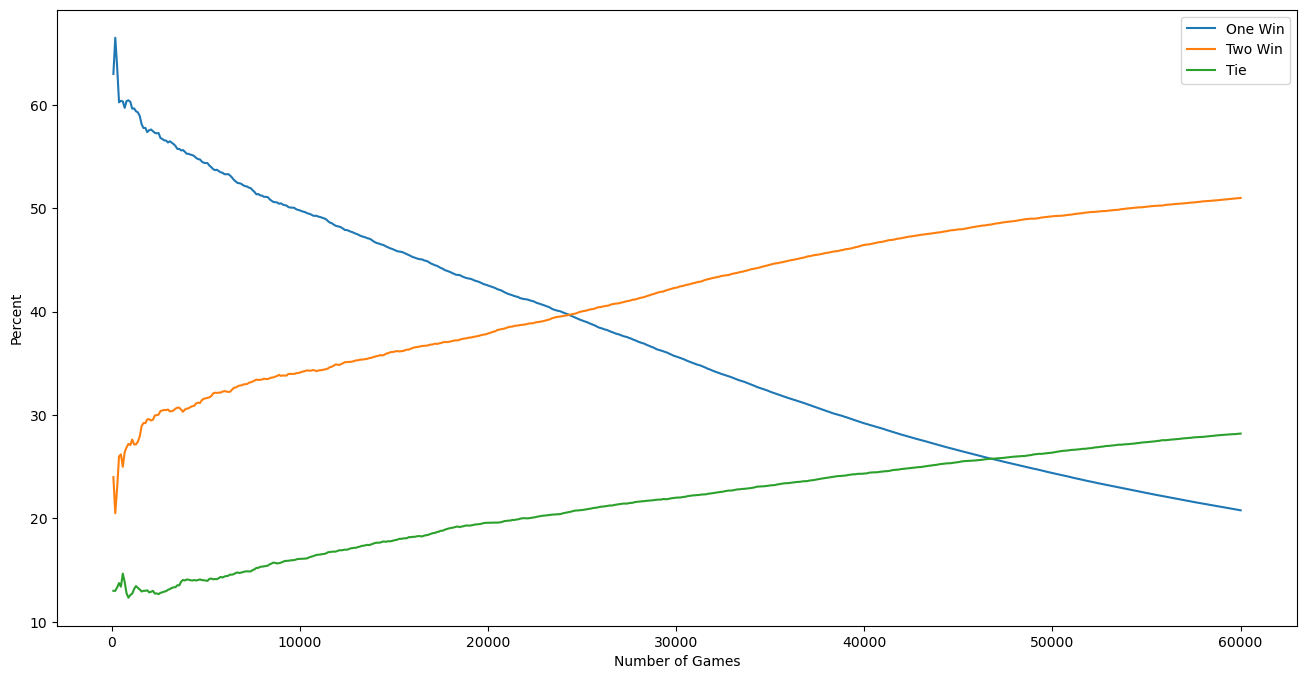

In [19]:
figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')